## Credit: Josh Meyers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import batoid

In [2]:
# The SST optics are _slightly_ different for the different filters.
# Here we load the configuration for r-band, but for the purposes
# of getting a good distribution of incident angles, I don't think
# changing this will make much difference.
telescope = batoid.Optic.fromYaml("LSST_r.yaml")

In [3]:
# It's easier to specify an incoming field angle than a particular
# spot on the focal plane, so we'll start there.
thx = np.deg2rad(0)
thy = np.deg2rad(0)
wavelength = 960e-9 # meters
rays = batoid.RayVector.asPolar(
    optic=telescope,
    wavelength=wavelength,
    theta_x=thx, theta_y=thy,
    nrad=500, naz=3000  #  These control how many parallel rays are created
)
# Make "full trace" of a small random subset of rays for visualization down 
# below.  This isn't needed generally, it's just for the 3D vis below.
tf = telescope.traceFull(rays[np.random.choice(len(rays), 20)])

# Now trace through the system
telescope.trace(rays)
# Limit to unvignetted rays
rays = rays[~rays.vignetted]

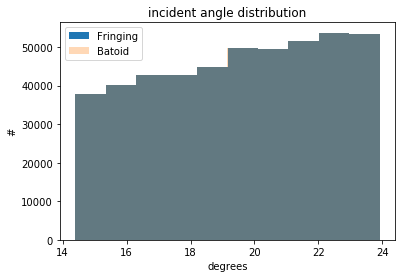

In [4]:
dxdz = rays.vx/rays.vz
dydz = rays.vy/rays.vz
plt.hist(np.arctan(np.sqrt(dxdz**2+dydz**2))*180/np.pi,label = 'Fringing')

# We can convert these to a 1d histogram of incident angles
inc_thx, inc_thy = batoid.utils.dirCosToField(rays.vx, rays.vy, -rays.vz)
plt.hist(np.rad2deg(np.hypot(inc_thx, inc_thy)),label = 'Batoid',alpha = 0.3)
plt.xlabel("degrees")
plt.ylabel("#")
plt.legend(loc = 'best')
plt.title("incident angle distribution");

(array([37860., 40260., 42660., 42750., 44916., 49620., 49362., 51528.,
        53694., 53231.]),
 array([14.39535591, 15.34758464, 16.29981336, 17.25204209, 18.20427081,
        19.15649953, 20.10872826, 21.06095698, 22.0131857 , 22.96541443,
        23.91764315]),
 <a list of 10 Patch objects>)

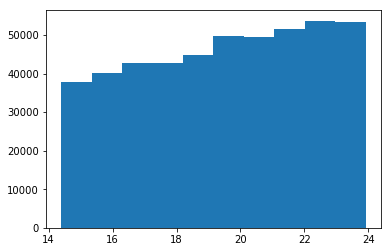

In [10]:
# Same as the angle calculation in Full sim
angles = np.arctan(np.sqrt(dxdz**2+dydz**2))*180/np.pi
plt.hist(angles)
#plt.hist(dxdz[mask][choice],density = True)

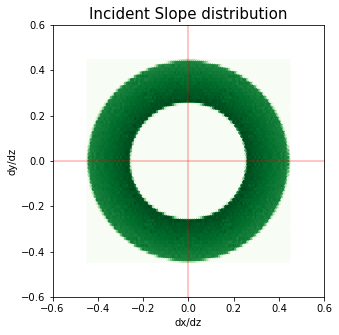

In [5]:
# Plot distribution of incident dxdz and dydz.
plt.figure(figsize = (5,5))
dxdz = rays.vx/rays.vz
dydz = rays.vy/rays.vz
plt.title('Incident Slope distribution',fontsize = 15)
plt.hexbin(
    dxdz, dydz, 
    reduce_C_function=np.sum,cmap=plt.cm.Greens
)

plt.axhline(0., c='r',alpha = 0.3)
plt.axvline(0., c='r',alpha = 0.3)
plt.gca().set_aspect("equal")
plt.xlabel("dx/dz")
plt.ylabel("dy/dz")
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

In [7]:
from mpl_toolkits import mplot3d

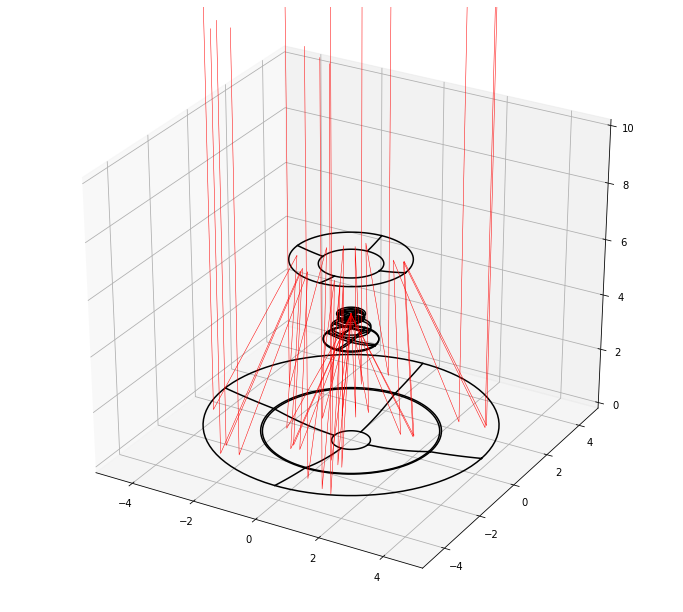

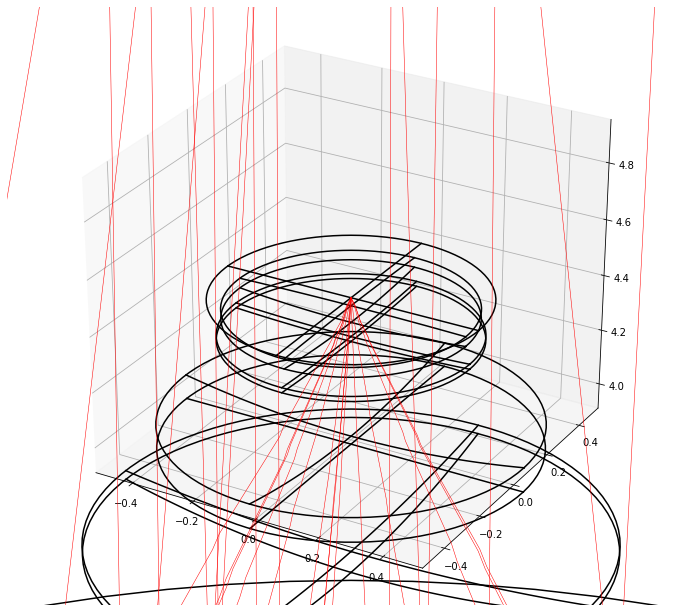

In [8]:
# We can visualize all of this too:
fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 10)
telescope.draw3d(ax, c='k')
batoid.drawTrace3d(ax, tf, c='r', lw=0.5)
plt.show()

# Zoom in on sensor
sensorZ = telescope['Detector'].coordSys.origin[2]
fig = plt.figure(figsize=(12, 11))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(sensorZ - 0.5, sensorZ + 0.5)
telescope.draw3d(ax, c='k')
batoid.drawTrace3d(ax, tf, c='r', lw=0.5)
plt.show()